In [134]:
# Libraries installation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [135]:
# Data import
df = pd.read_csv("data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [136]:
# Data preparation for training
X = df.drop(['Species'], axis=1)
X = X.drop(['Id'], axis=1)
target =  df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)

In [137]:
# Normalize data
X_norm = (X_train- X_train.mean()).div( X_train.std())
X_norm.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,0.610470,0.108048,0.943562,0.732966
84,-0.565396,-0.123483,0.383307,0.346630
27,-0.800569,1.034174,-1.297456,-1.327496
127,0.257711,-0.123483,0.607409,0.732966
132,0.610470,-0.586546,0.999587,1.248082


In [138]:
y_train.head()

137    2
84     1
27     0
127    2
132    2
Name: Species, dtype: int64

In [139]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [140]:
# linear regression function
# X: input data # y: output data # theta: parameters # alpha: learning rate # num_iters: number of iterations

def logregression(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    for i in range(num_iters):
        z = np.dot(X, theta) 
        h = sigmoid(z) # hypothesis
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - alpha * gradient # update theta
    return theta

In [141]:
# Prediction function
def predict(X, theta):
    z = np.dot(X, theta) # z = theta.T * X
    h = sigmoid(z) # h is the sigmoid function
    h = h.round() # round to 0 or 1
    return h

In [142]:
# Error for classification model
def error(y, h):
    m = len(y) # number of training examples
    error = 0
    for i in range(m):
        if y[i] == 1:
            error -= np.log(h[i]) # if y = 1, error = -log(h)
        else:
            error -= np.log(1 - h[i]) # if y = 0, error = -log(1 - h)
    error = error / m # average error
    return error

In [143]:
# Gradient descent function
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    error_history = np.zeros(num_iters) # initialize error_history
    for i in range(num_iters):
        z = np.dot(X, theta) # z = theta.T * X
        h = sigmoid(z) # h is the sigmoid function
        gradient = np.dot(X.T, (h - y)) / m # gradient of error function
        theta = theta - alpha * gradient # update theta
        error_history[i] = error(y, h) # save error to error_history
    return theta, error_history

In [144]:
# Evaluation : Confusion matrix
def confusion_matrix(y_test, y_pred):
    unique_classes = np.unique(np.concatenate((y_test, y_pred)))
    num_classes = len(unique_classes)
    
    cm = np.zeros((num_classes, num_classes))
    
    for i in range(len(y_test)):
        cm[y_test[i] - 1][y_pred[i] - 1] += 1
    
    return cm



In [145]:
# plot results
def plot_results(X, y, theta):
    # plot data
    plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1], label='Iris-setosa')
    plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], label='Iris-versicolor')
    plt.scatter(X[y == 2].iloc[:, 0], X[y == 2].iloc[:, 1], label='Iris-virginica')
    # plot decision boundary
    x1_min, x1_max = X.iloc[:, 0].min(), X.iloc[:, 0].max(),
    x2_min, x2_max = X.iloc[:, 1].min(), X.iloc[:, 1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = predict(grid, theta).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')
    plt.legend()
    plt.show()


In [146]:
# main function
def main():
    # initialize theta
    theta = np.zeros(X_norm.shape[1])
    #print("theta: ", theta)
    # train model
    theta = logregression(X_norm, y_train, theta, 0.1, 1000)
    #print("theta: ", theta)
    # predict
    y_pred = predict(X_norm, theta)
    print("y_pred: ", y_pred)
    # evaluate
    #cm = confusion_matrix(y_test, y_pred)
    #print("confusion matrix: ", cm)
    #print(classification_report(y_test, y_pred)) 
    # plot results
    plot_results(X_norm, y_train, theta)
    

y_pred:  [1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.]


ValueError: shapes (2500,2) and (4,) not aligned: 2 (dim 1) != 4 (dim 0)

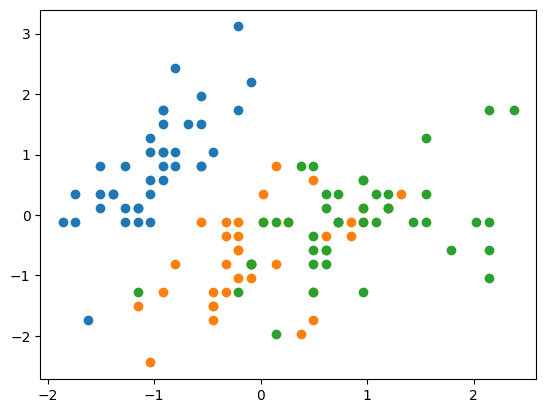

In [148]:
main()